# Deep Learning
## HW3


## 1. *Import libraries*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## 2. *Load data*

In [8]:
data_csv = pd.read_csv("/content/drive/MyDrive/MSC1401_1/DeepLearning/HW3/Data.csv")
data = data_csv.iloc[:,1:2]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [6]:
data_csv

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data

## 3. *Training and test data*

In [28]:
x, y = [], []
seq_len = 4
for i in range(len(data)-seq_len-1):
  x.append(np.array(data[i:(i+seq_len)]))
  y.append(np.array(data[i+seq_len]))

train_size = int(len(x) * 0.8)

####################
# YOUR CODE
x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:len(x)]
y_test = y[train_size:len(y)]

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)
####################

## 4. *Build the structure of models*

In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        ####################
        # YOUR CODE
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size

        self.lstm = nn.LSTM(self.input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, self.output_size)

        ####################

    def forward(self, x):
        ####################
        # YOUR CODE 

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, (h_,c_) = self.lstm(x,(h0,c0))
        out = self.fc(out[:,-1,:])

        return out
        ####################

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU, self).__init__()
        ####################
        # YOUR CODE
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size

        self.gru = nn.GRU(self.input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, self.output_size)

        ####################

    def forward(self, x):
        ####################
        # YOUR CODE

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.gru(x,h0)
        out = self.fc(out[:,-1,:])
        
        return out
        ####################


## 5. *Train and test the models*






In [36]:
input_size = 1
hidden_size = 2
num_layers = 1
output_size = 1

num_epochs = 500
learning_rate = 1e-2
 
####################
# YOUR CODE
lstm = LSTM(input_size,hidden_size,output_size, num_layers)
gru = GRU(input_size,hidden_size,output_size, num_layers)
criterion = nn.MSELoss()
lstm_optimizer = torch.optim.Adam(lstm.parameters(), lr = learning_rate)
gru_optimizer = torch.optim.Adam(gru.parameters(), lr = learning_rate)
####################

def train_test(model, criterion, optimizer, x_train, y_train, num_epochs, learning_rate):
    epochs = np.zeros(num_epochs)
    train_losses = np.zeros(num_epochs)
    test_losses = np.zeros(num_epochs)
    
    for epoch in range(num_epochs):
        # Train the model
        ####################
        # YOUR CODE
        model.train()
        optimizer.zero_grad()
        pred = model(x_train)
        train_loss = criterion(pred,y_train)
        train_loss.backward()
        optimizer.step()
        train_losses[epoch] = train_loss.item()

        ####################
        
        # Test the model
        ####################
        # YOUR CODE
        model.eval()
        test_pred = model(x_test)
        test_loss = criterion(y_test,test_pred)
        test_losses[epoch] = test_loss.item()
        ####################
        epochs[epoch] = epoch+1
        print('Epoch: {0} , Train_loss: {1:.5f} , Test_loss: {2:.5f}'.format(epoch+1, train_loss, test_loss))

    return epochs, train_losses, test_losses

In [37]:
lstm_epochs, lstm_train_losses, lstm_test_losses = train_test(lstm, criterion, lstm_optimizer, x_train, y_train, num_epochs, learning_rate)

Epoch: 1 , Train_loss: 0.24208 , Test_loss: 0.56816
Epoch: 2 , Train_loss: 0.21902 , Test_loss: 0.53255
Epoch: 3 , Train_loss: 0.19803 , Test_loss: 0.49561
Epoch: 4 , Train_loss: 0.17850 , Test_loss: 0.45841
Epoch: 5 , Train_loss: 0.16010 , Test_loss: 0.42153
Epoch: 6 , Train_loss: 0.14269 , Test_loss: 0.38535
Epoch: 7 , Train_loss: 0.12620 , Test_loss: 0.35015
Epoch: 8 , Train_loss: 0.11061 , Test_loss: 0.31612
Epoch: 9 , Train_loss: 0.09592 , Test_loss: 0.28341
Epoch: 10 , Train_loss: 0.08216 , Test_loss: 0.25218
Epoch: 11 , Train_loss: 0.06937 , Test_loss: 0.22257
Epoch: 12 , Train_loss: 0.05762 , Test_loss: 0.19473
Epoch: 13 , Train_loss: 0.04697 , Test_loss: 0.16881
Epoch: 14 , Train_loss: 0.03752 , Test_loss: 0.14495
Epoch: 15 , Train_loss: 0.02935 , Test_loss: 0.12327
Epoch: 16 , Train_loss: 0.02257 , Test_loss: 0.10390
Epoch: 17 , Train_loss: 0.01725 , Test_loss: 0.08690
Epoch: 18 , Train_loss: 0.01344 , Test_loss: 0.07233
Epoch: 19 , Train_loss: 0.01114 , Test_loss: 0.06017
Ep

In [38]:
gru_epochs, gru_train_losses, gru_test_losses = train_test(gru, criterion, gru_optimizer, x_train, y_train, num_epochs, learning_rate)

Epoch: 1 , Train_loss: 0.36900 , Test_loss: 0.86641
Epoch: 2 , Train_loss: 0.33914 , Test_loss: 0.81654
Epoch: 3 , Train_loss: 0.30976 , Test_loss: 0.76664
Epoch: 4 , Train_loss: 0.28100 , Test_loss: 0.71690
Epoch: 5 , Train_loss: 0.25302 , Test_loss: 0.66753
Epoch: 6 , Train_loss: 0.22596 , Test_loss: 0.61872
Epoch: 7 , Train_loss: 0.19999 , Test_loss: 0.57065
Epoch: 8 , Train_loss: 0.17526 , Test_loss: 0.52353
Epoch: 9 , Train_loss: 0.15190 , Test_loss: 0.47755
Epoch: 10 , Train_loss: 0.13007 , Test_loss: 0.43293
Epoch: 11 , Train_loss: 0.10993 , Test_loss: 0.38991
Epoch: 12 , Train_loss: 0.09163 , Test_loss: 0.34876
Epoch: 13 , Train_loss: 0.07533 , Test_loss: 0.30976
Epoch: 14 , Train_loss: 0.06117 , Test_loss: 0.27319
Epoch: 15 , Train_loss: 0.04929 , Test_loss: 0.23935
Epoch: 16 , Train_loss: 0.03975 , Test_loss: 0.20848
Epoch: 17 , Train_loss: 0.03258 , Test_loss: 0.18078
Epoch: 18 , Train_loss: 0.02772 , Test_loss: 0.15639
Epoch: 19 , Train_loss: 0.02500 , Test_loss: 0.13536
Ep

## 6. *Compare LSTM and GRU loss*

[]

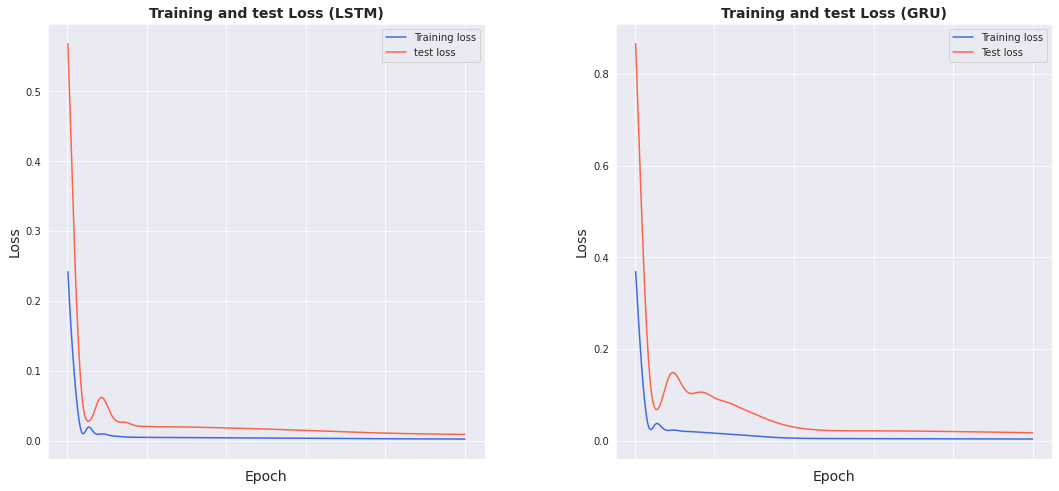

In [40]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = lstm_epochs, y = lstm_train_losses, label="Training loss", color="royalblue")
ax = sns.lineplot(x = lstm_epochs, y = lstm_test_losses, label="test loss", color="tomato")
ax.set_title("Training and test Loss (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = gru_epochs, y = gru_train_losses, label="Training loss", color="royalblue")
ax = sns.lineplot(x = gru_epochs, y = gru_test_losses, label="Test loss", color="tomato")
ax.set_title("Training and test Loss (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

### 7. *Make predictions*

In [41]:
x_data = torch.Tensor(np.array(x))
y_data = torch.Tensor(np.array(y))

y_data = pd.DataFrame(scaler.inverse_transform(y_data.detach().numpy()))

lstm_data_predict = lstm(x_data).detach().numpy()
gru_data_predict = gru(x_data).detach().numpy()

lstm_data_predict = pd.DataFrame(scaler.inverse_transform(lstm_data_predict))
gru_data_predict = pd.DataFrame(scaler.inverse_transform(gru_data_predict))

## 8. *Compare LSTM and GRU prediction results*

[]

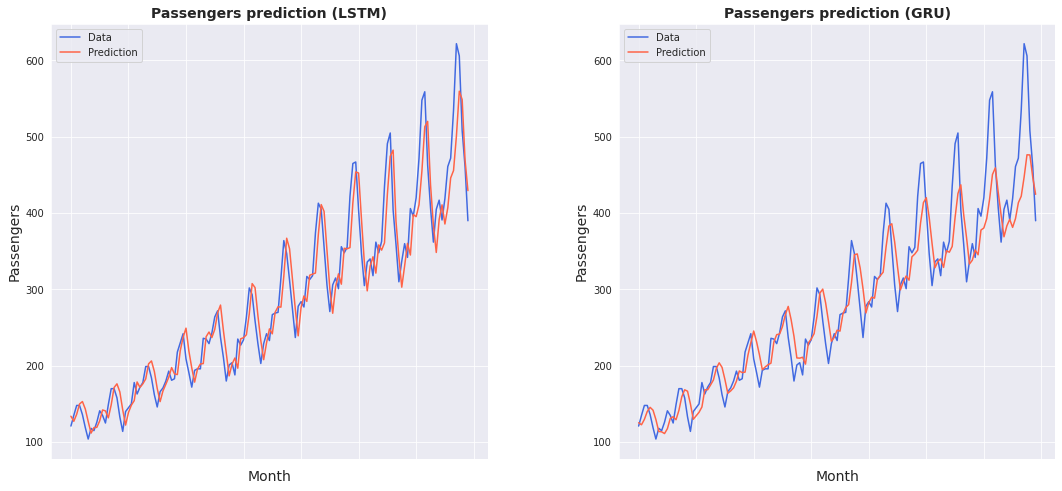

In [42]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = lstm_data_predict.index, y = lstm_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = gru_data_predict.index, y = gru_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)